# ST2195 - Coursework Question 1 (Python)

In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Set working directory
import os
file_path = "C:\\Users\\Trixie\\Desktop\\From WDBLACK\\Year 2 UOL Subjects\\Programming Assignment\\Final\\.Rhistory"
directory_path = os.path.dirname(file_path)
os.chdir(directory_path)

In [3]:
# Probability Density Function
def pdf_f(x):
    return 1/2 * np.exp(-np.abs(x))

# Metropolis-Hastings algorithm function
def metropolis_hastings(N, s):
    samples = np.zeros(N + 1)  # Include x0 in samples
    samples[0] = 0  # Initial value x0
    for i in range(1, N + 1):
        x_star = np.random.normal(loc=samples[i - 1], scale=s)  # Generate x* from N(xi-1, s)
        log_r = np.log(pdf_f(x_star)) - np.log(pdf_f(samples[i - 1]))  # Compute log r(x*, xi-1)
        log_u = np.log(np.random.uniform())  # Generate log u
        if log_u < log_r:
            samples[i] = x_star  # Accept x*
        else:
            samples[i] = samples[i - 1]  # Reject x*, keep xi-1
    return samples[1:]  # Exclude the initial value x0

In [4]:
# Parameters
N = 10000
s = 1

In [5]:
# Generate samples
samples = metropolis_hastings(N, s)


In [6]:
# Compute sample mean and standard deviation
sample_mean = np.mean(samples)
sample_std = np.std(samples)


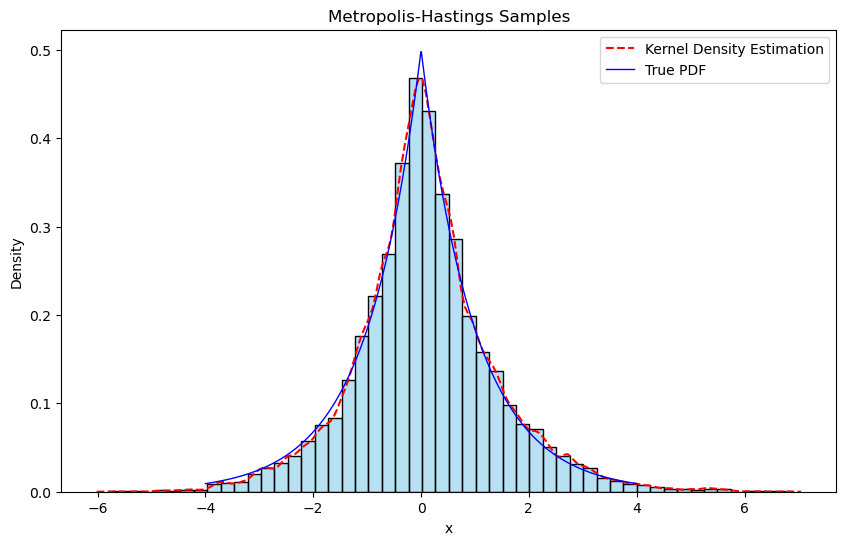

In [7]:
# Create a histogram with kernel density estimation
plt.figure(figsize=(10, 6))
sns.histplot(samples, bins=50, stat='density', color='skyblue', edgecolor='black', alpha=0.6)

# Overlay a kernel density plot using seaborn
sns.kdeplot(samples,color='red', label='Kernel Density Estimation', linestyle='--', bw_adjust = 0.5) #Adjusted Bandwidth

# Overlay the true PDF using plt.plot
x_values = np.linspace(-4, 4, 1000)
plt.plot(x_values, pdf_f(x_values), color='blue', label='True PDF', linewidth=1)

# Additional settings for aesthetics
plt.title("Metropolis-Hastings Samples")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

In [8]:
# Print sample mean and standard deviation
print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std)

Sample mean: 0.07785219581903352
Sample standard deviation: 1.2996344670772835


In [9]:
## Part B

In [10]:
# Functions
# Metropolis-Hastings algorithm with initial value
def metropolis_hastings_with_initial(N, s, initial_value):
    samples = np.zeros(N + 1)
    samples[0] = initial_value
    for i in range(1, N + 1):
        x_star = np.random.normal(loc=samples[i - 1], scale=s)
        log_r = np.log(pdf_f(x_star)) - np.log(pdf_f(samples[i - 1]))
        u = np.log(np.random.uniform())
        if u < log_r:
            samples[i] = x_star
        else:
            samples[i] = samples[i - 1]
    return samples[1:]  # Exclude the initial value x0



In [11]:
def compute_r_hat(chains):
    J = len(chains)
    N = len(chains[0])
    Mj = np.mean(chains, axis=1)
    Vj = np.var(chains, axis=1, ddof=1) * (N - 1) / N  # ddof=1 for sample variance
    W = np.mean(Vj)
    M = np.mean(Mj)
    B = N * np.var(Mj, ddof=1) / (J - 1)
    R_hat = np.sqrt((B / W) + (1 - 1 / N))
    return R_hat

In [12]:
# Parameters for part b
N = 2000
J = 4
s_values = np.linspace(0.001, 1, num=100)

In [13]:
# Calculate R hat for each s value
r_hats = np.zeros_like(s_values)
for i, s_value in enumerate(s_values):
    chains = np.array([metropolis_hastings_with_initial(N, s_value, np.random.normal()) for _ in range(J)])
    r_hats[i] = compute_r_hat(chains)

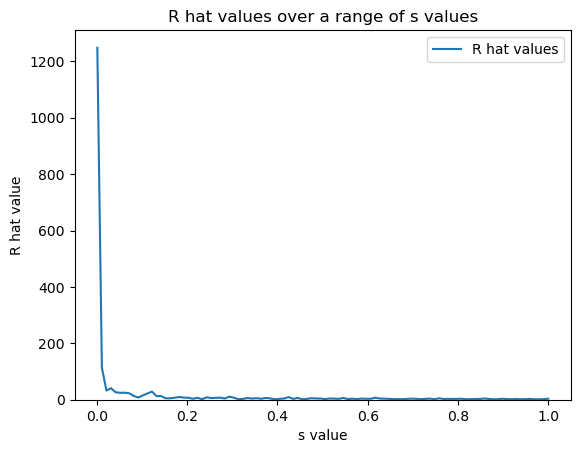

In [14]:
# Plot R hat values
plt.ylim(0, max(r_hats)*1.05)  
plt.plot(s_values, r_hats, label="R hat values")
plt.xlabel("s value")
plt.ylabel("R hat value")
plt.title("R hat values over a range of s values")
plt.legend()
plt.show()